In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, beta, bernoulli

In [10]:
np.random.seed(123)
x = beta.rvs(size = 10000, a = 1.7, b = 2.3,random_state=123) #simulate an population

In [12]:
#get many many simple random samples
n = 35 #sample size
k = 200 #how many simple random samples we want
#We organuze all these samples as rows of a matrix
samples = np.array([np.random.choice(x,size=n,replace=True,p=None) for _i in range(k)])

In [13]:
samples.shape
#200 samples by 35 observations

(200, 35)

In [17]:
means = np.mean(samples, axis = 1) #axis =1 computes the mean for each row
s = np.std(samples, axis = 1) 
#print(means,s)

In [20]:
#We want a t-score cutoff for a 95% confidence level
t_alpha2 = np.abs(t.ppf(.025,df = n-1))
t_alpha2

2.032244509317719

Mu can be estimated as the average of observations for the whole population. Then we show that the probability that the distance between sample means and the population mean is less than t_alpha2 * s / sqrt(n) is greater than 95%

In [21]:
mu = np.mean(x)

In [23]:
sum(np.abs(means - mu)<t_alpha2*s/np.sqrt(n))/k

0.955

In [2]:
#Simulate a population from some distribution
mu = 7
sigma = 2
x = norm.rvs(size = 5000, loc = mu, scale = sigma)

In [3]:
#create many samples of a perscibed size, compute the mean of the samples
n = 100 #sample size
k = 200 # how many samples we want
means = np.array([np.mean(np.random.choice(x, size = n,replace = True,p=None)) for _i in range(k)])

In [4]:
means.shape

(200,)

In [5]:
#decide a confidence level
alpha = .05
CL = 1 - alpha #confidence level

In [6]:
#we show the meaning of z_alpha2
z = np.arange(-3,3.1,0.1)

In [7]:
y = norm.pdf(z)

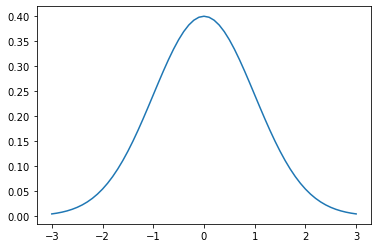

In [8]:
plt.plot(z,y)

In [30]:
#to cut the nomral curve and guarantee a percentage in the tail we use the percentage point function
z_alpha2 = norm.ppf(.025)

In [31]:
z_alpha2

-1.9599639845400545

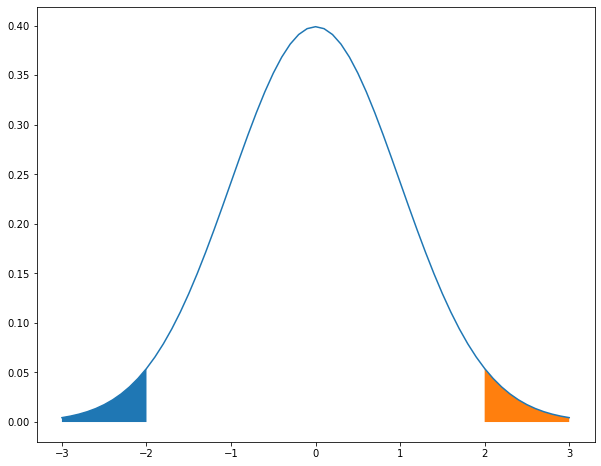

In [44]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(z,y)
ax.fill_between(z,y,where=(z<z_alpha2)&(z>-4))
ax.fill_between(z,y,where=(z>np.abs(z_alpha2))&(z<4))
plt.show()

In [39]:
np.abs(means[0]-mu)

0.002336230224622149

In [41]:
#the value of d aka the margin of error is 
d = np.abs(z_alpha2) * sigma/np.sqrt(n)

In [42]:
d

0.3919927969080109

lets count how many times the distance between the mean of the sample and the mean of the population is larger than the margin of error

In [47]:
np.sum(np.abs(means- mu) > d)/k # the inequaltiy is true alpha kinda = .05 through a monte carlo simulation

0.065

Lets simulate for a beta population

In [55]:
#Simulate a population from some distribution
mu = 7
sigma = 2
x = beta.rvs(size = 5000, loc = 5, scale =2, a = 1.8, b = 1.9)

(array([206., 446., 614., 678., 682., 693., 618., 523., 357., 183.]),
 array([5.0075844 , 5.20475163, 5.40191885, 5.59908608, 5.7962533 ,
        5.99342053, 6.19058776, 6.38775498, 6.58492221, 6.78208943,
        6.97925666]),
 <BarContainer object of 10 artists>)

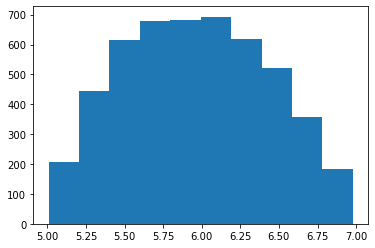

In [56]:
plt.hist(x)

In [57]:
mu = np.mean(x)
mu

5.965795674049232

In [58]:
sigma = np.std(x)
sigma

0.46478379300494466

In [68]:
n = 100 #sample size
k = 200 # how many samples we want
samples = np.array([(np.random.choice(x, size = n,replace = True,p=None)) for _i in range(k)])
samples.shape
#(200k,100n)

(200, 100)

In [70]:
means = np.mean(samples,axis = 1)
s = np.std(samples, axis = 1)

In [65]:
t_alpha2 = t.ppf(0.025,df = n-1)
t_alpha2

-1.9842169515086832

In [75]:
#What is d here?
d = np.abs(t_alpha2)*s/np.sqrt(n) # for each sample you have a mean and a st.dev

In [76]:
np.abs(means[0]-mu)

0.06583983351929934

In [77]:
d[0]

0.09712156552069104

In [80]:
counter = 0
for i in range(k):
    if np.abs(means[i] - mu) > d[i]:
        counter +=1
counter

10

In [81]:
10/k

0.05